In [1]:
#importing libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
# import all libraries

import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#checking all columns
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
#lets check the overview of the description of the df.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#exploring the balance
notFraud=df[df['Class']==0].shape[0]
fraud=df[df['Class']==1].shape[0]
sumTotal=fraud+notFraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/sumTotal,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*notFraud/sumTotal,4)))

Percentage of Fradulent transaction: 0.1727
Percentage of Non Fradulent transaction: 99.8273


In [6]:
#size of data
print(df.shape)
print(df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

### approximately 2.8 lakhs of rows with 31 columns. Notice the high memory usage of close to 70MB to do this. 

### Check for missing values

In [7]:
# isnull()
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# summing up the missing values (column-wise)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

WOW No missing Values. So Cool!

In [9]:
# columns having at least one missing value
df.isnull().any()

# above is equivalent to axis=0 (by default, any() operates on columns)
df.isnull().any(axis=0)

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Absolutely clean data! lets dive in

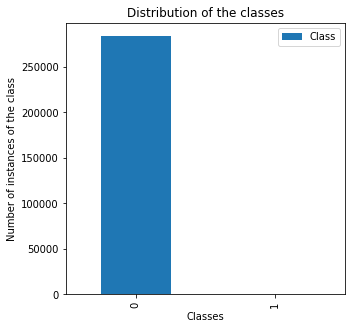

In [10]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
#Visualization 1: Check distribution
df['Class'].value_counts().plot(figsize=(5,5),kind='bar',legend='True')
plt.title("Distribution of the classes")
plt.xlabel("Classes")
plt.ylabel("Number of instances of the class")
plt.show()

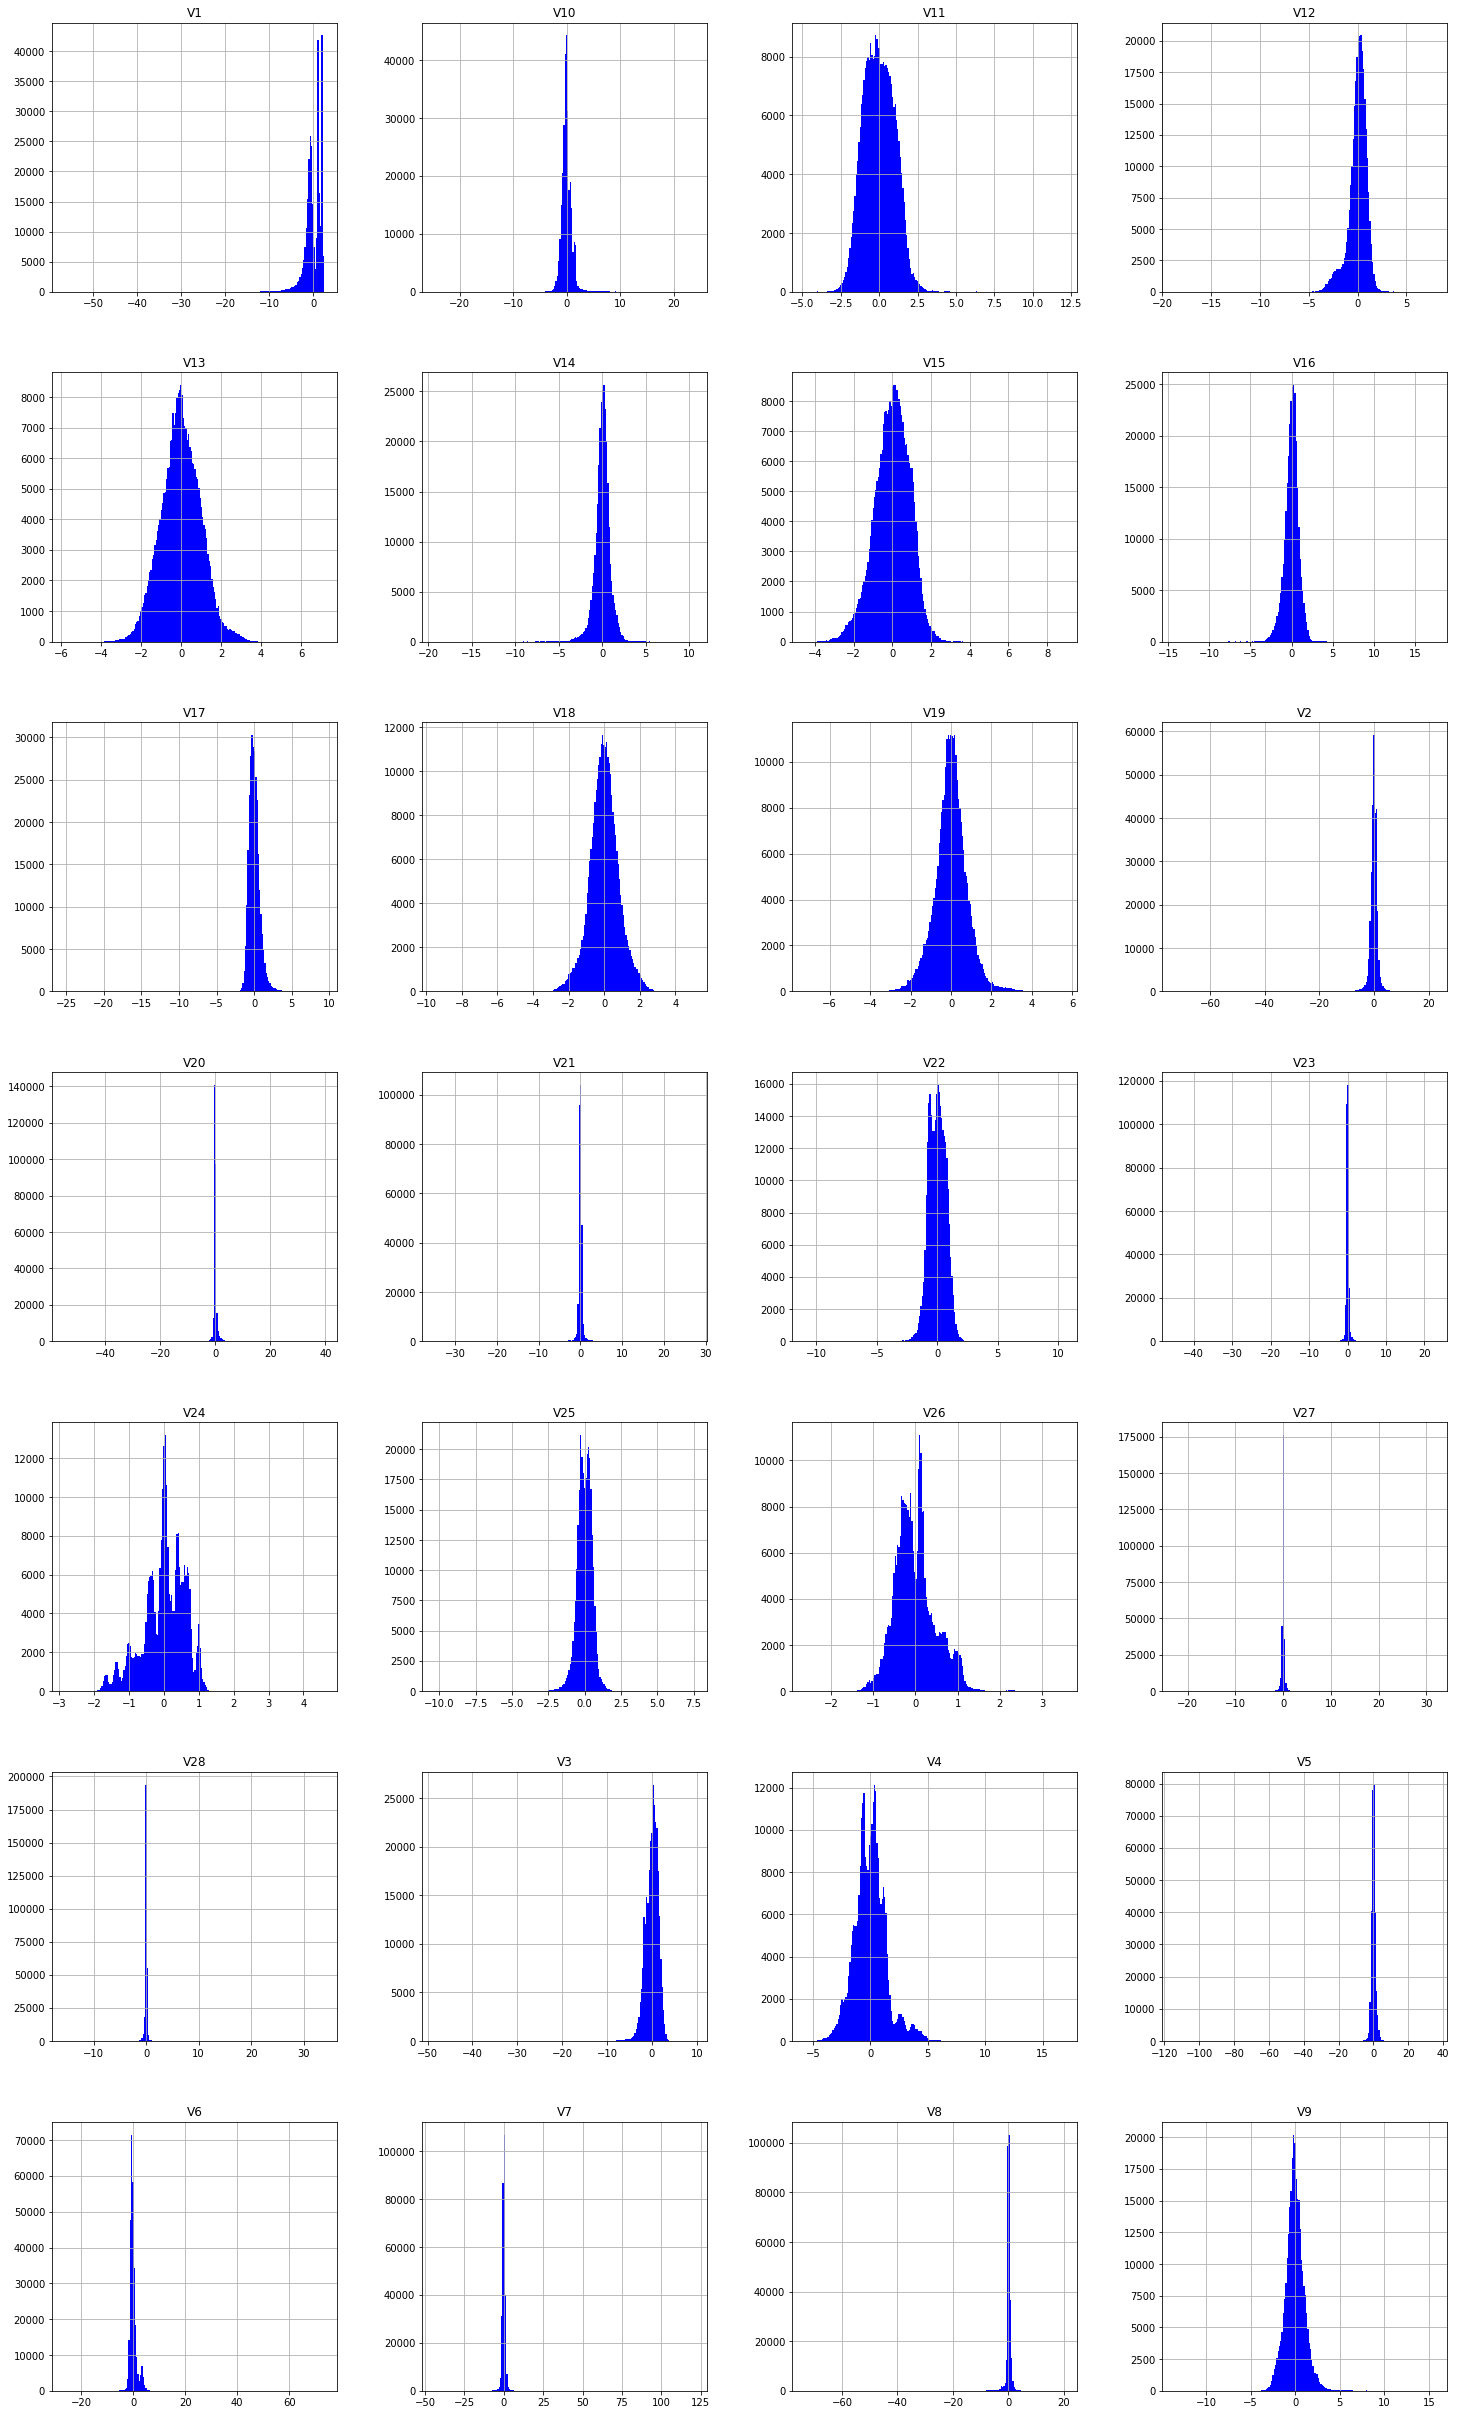

In [11]:
#Visualiazation 2: Lets now see if the distribution of all the independent variables is normal gaussian
df.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

This is a very useful chart. We can actually identify by mere thickness of the graph. Just notice V11, V15, V13, V18, V19 has good distribution but look at V6, V7, V8, V27, V20 and V28 have bleak distribution

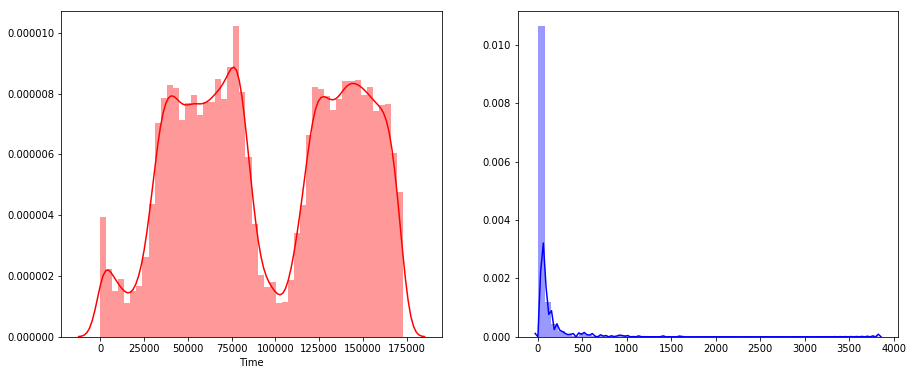

In [12]:
#Visualization 3: Lets now find out how is the dsitribution of time and amount features are like
import seaborn as sn
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sn.distplot(df['Time'],color='red')
plt.subplot(1,2,2)
sn.distplot(sorted(df['Amount'][0:1000]),color='blue')
plt.show()

## From the 'Amount chart' and what was explained by the trainner, this looks like a local bank as the amount of transaction is lower. international banks have higher amount of transactions. But thats not what we can infer from this chart although its a good observation. We can clearly see how the amount is skewed towards zero and oon the Time chart there is a significant rise at a certain interval and a fall at a certain interval 


In [13]:
#Making notes of some information with respect to Amount feature for fraud transactions
print("Please note that the lowest transaction amount for a fraud transaction is: $",df[df.Class == 1]['Amount'].min())
print("Please note that the highest transaction amount for a fraud transaction is: $",df[df.Class == 1]['Amount'].max())
print("Please note that the median transaction amount for a fraud transaction is: $",df[df.Class == 1]['Amount'].median())
print("Please note that the average transaction amount for a fraud transaction is: $",df[df.Class == 1]['Amount'].mean())

Please note that the lowest transaction amount for a fraud transaction is: $ 0.0
Please note that the highest transaction amount for a fraud transaction is: $ 2125.87
Please note that the median transaction amount for a fraud transaction is: $ 9.25
Please note that the average transaction amount for a fraud transaction is: $ 122.21132113821133


In [14]:
#Further some more details from Amount can be extracted purely for any transaction
print("Please note that the lowest transaction amount is: $",df['Amount'].min())
print("Please note that the highest transaction amount is: $",df['Amount'].max())
print("Please note that the median transaction amount is: $",df['Amount'].median())
print("Please note that the average transaction amount is: $",df['Amount'].mean())

Please note that the lowest transaction amount is: $ 0.0
Please note that the highest transaction amount is: $ 25691.16
Please note that the median transaction amount is: $ 22.0
Please note that the average transaction amount is: $ 88.34961925087359


In [15]:
#And finally the same details for what is a non fraud transaction
print("Please note that the lowest transaction amount for non fraud transaction is: $",df[df.Class == 0]['Amount'].min())
print("Please note that the highest transaction amount for non fraud transaction is: $",df[df.Class == 0]['Amount'].max())
print("Please note that the median transaction amount for non fraud transaction is: $",df[df.Class == 0]['Amount'].median())
print("Please note that the average transaction amount for non fraud transaction is: $",df[df.Class == 0]['Amount'].mean())

Please note that the lowest transaction amount for non fraud transaction is: $ 0.0
Please note that the highest transaction amount for non fraud transaction is: $ 25691.16
Please note that the median transaction amount for non fraud transaction is: $ 22.0
Please note that the average transaction amount for non fraud transaction is: $ 88.29102242225574


In [16]:
#Lets check the distribution share
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [17]:
normal_share

99.82725143693798

### 99% of data in the dataset are normal transactions

In [18]:
#total classes. 0 is normal share and 1 is fraud share
classes

0    284315
1       492
Name: Class, dtype: int64

In [19]:
fraud_share

0.1727485630620034

### Only 0.17% are fraudulent transactions. Hence the imbalance of classes

In [20]:
# lets standardize the time and amount column and check what happens using StandardScaler
#from sklearn.preprocessing import StandardScaler
#df["standardTime"]=StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
#df["standardAmount"]=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
#df=df.drop(["Amount","Time"], axis=1)

In [21]:

#Get Corelation Matrix between all the features present in the data
#correl_info = df.corr()
#plt.figure(figsize=(11,11))
#sn.heatmap(correl_info,square='True',cmap='Spectral_r')
#plt.title('Correlation w.r.t All features')
#plt.show()

Not much correlation, as you can see from the scale that may be some mild correlation with V7 and V20 but nothing that is significant or heavily correlated at this point of time that can be noticed

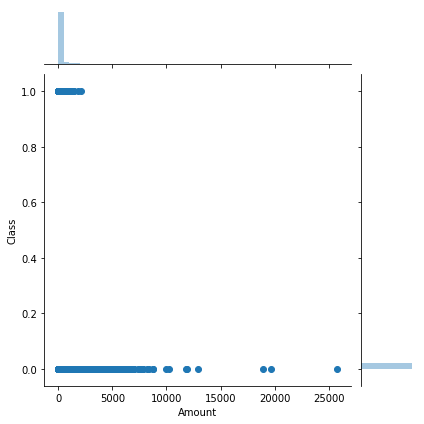

In [22]:
sns.jointplot('Amount', 'Class', df)
plt.show()

In [23]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

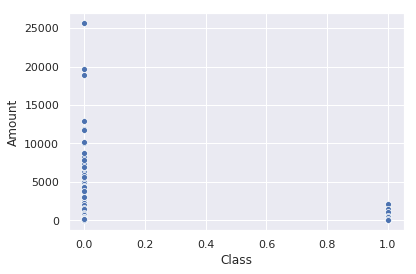

In [24]:
# Create a scatter plot to observe the distribution of classes with Amount

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Class", y="Amount", data=df)

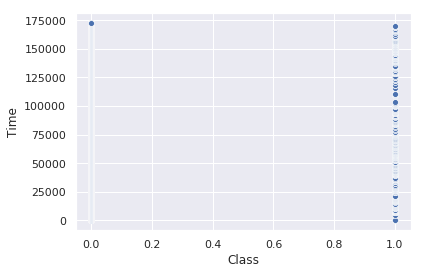

In [25]:

# Create a scatter plot to observe the distribution of classes with time

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Class", y="Time", data=df)

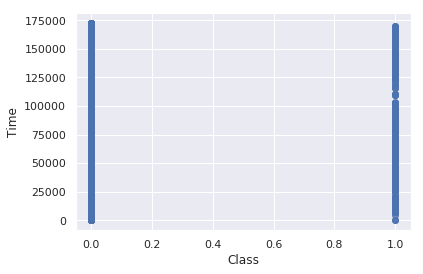

In [26]:
# visualise Class and Time relationship
sns.regplot(x="Class", y="Time", data=df, fit_reg=False)

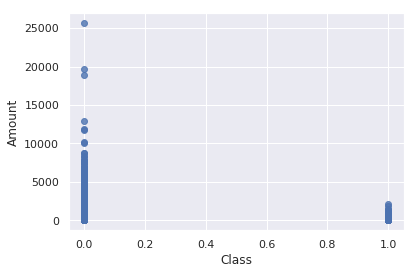

In [27]:
# visualise Class and Amount relationship
sns.regplot(x="Class", y="Amount", data=df, fit_reg=False)

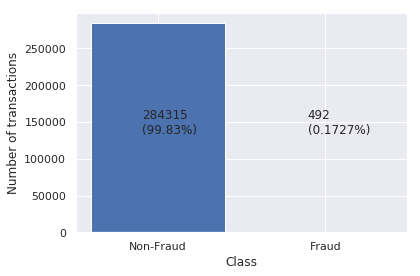

In [28]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

In [29]:
y = df['Class']
X = df.drop(columns=['Class'])

In [30]:
# split into train and test
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

199364
85443


In [33]:
print(np.sum(y))
print(np.sum(df_train))
print(np.sum(df_test))

492
Time      1.890460e+10
V1        1.482418e+03
V2       -1.173600e+02
V3       -2.303475e+02
V4        5.365768e+02
V5        3.489220e+02
V6        2.459308e+02
V7       -3.292214e+02
V8        1.288014e+02
V9        2.679913e+02
V10      -3.590129e+02
V11      -7.526983e+01
V12       1.250148e+01
V13       4.210228e+02
V14       1.113749e+02
V15       6.524224e+01
V16      -7.440663e+01
V17      -3.028216e+02
V18       1.747550e+02
V19      -1.164540e+02
V20       1.036007e+02
V21      -4.164240e+01
V22       9.884158e+01
V23       4.056962e+01
V24      -8.009893e+01
V25       2.475317e+02
V26       2.024487e+01
V27       2.794899e+01
V28      -4.197831e+01
Amount    1.756127e+07
Class     3.510000e+02
dtype: float64
Time      8.099054e+09
V1       -1.482418e+03
V2        1.173600e+02
V3        2.303475e+02
V4       -5.365768e+02
V5       -3.489220e+02
V6       -2.459308e+02
V7        3.292214e+02
V8       -1.288014e+02
V9       -2.679913e+02
V10       3.590129e+02
V11       7.526

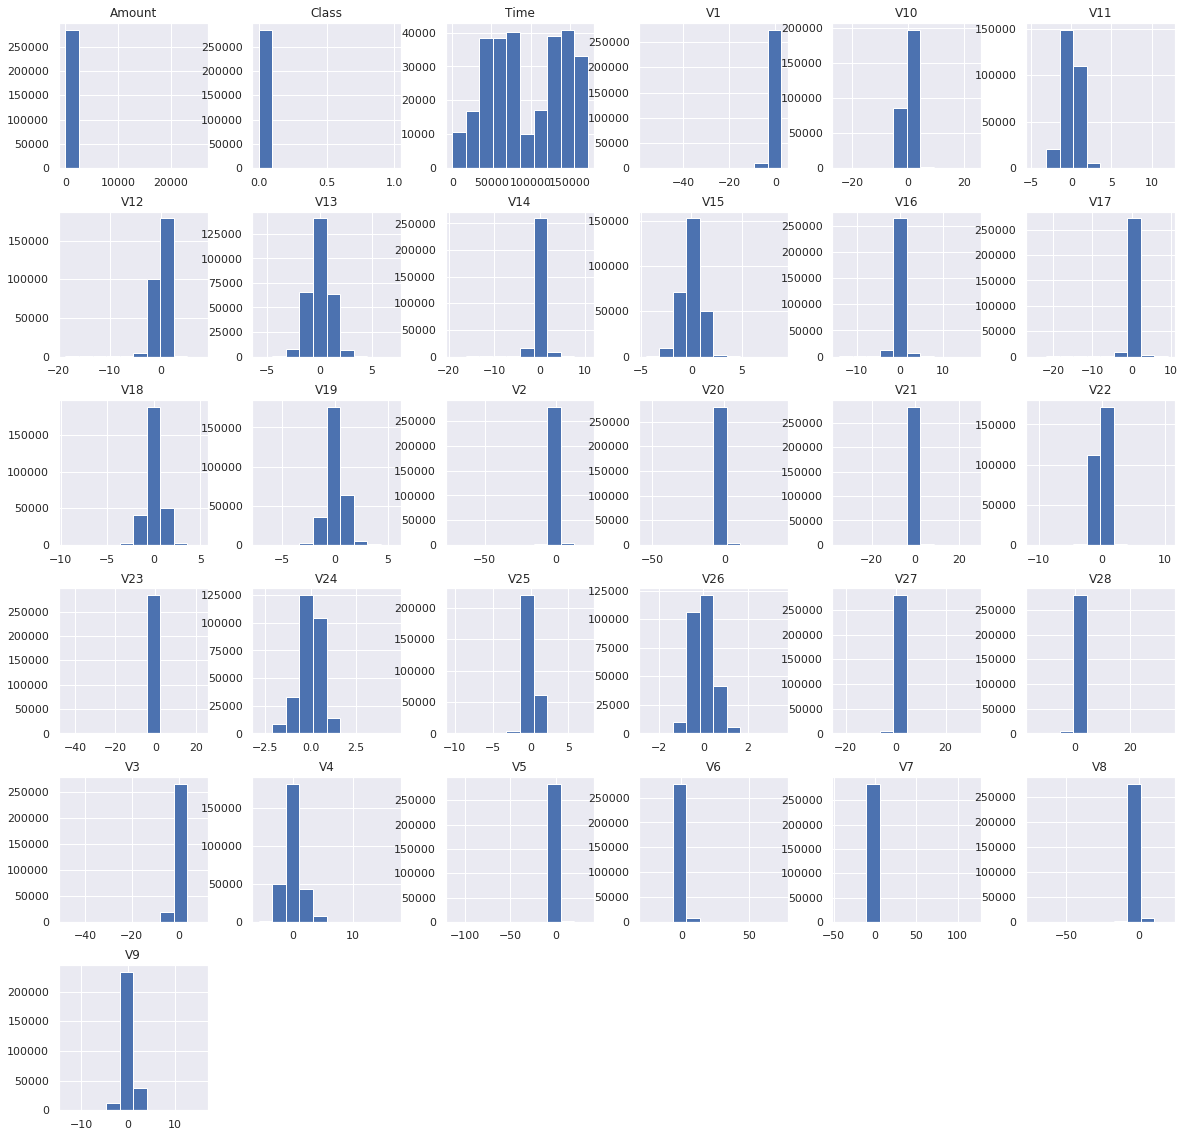

In [34]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(figsize = (20, 20))
plt.show()

In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
print(pt.fit(df))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)


In [36]:
print(pt.lambdas_)

[ 7.70250635e-01  1.48305400e+00  1.21181645e+00  1.34139420e+00
  8.22124037e-01  1.03167023e+00  7.12978708e-01  1.00056423e+00
  1.28829032e+00  8.49491966e-01  8.64289142e-01  8.69913834e-01
  1.53988549e+00  9.70235195e-01  1.25919610e+00  1.17407763e+00
  1.26244287e+00  1.14577666e+00  1.06970354e+00  9.65291808e-01
  1.01850228e+00  9.00467984e-01  1.07445675e+00  1.07407766e+00
  1.42027824e+00  1.19011365e+00  5.18988837e-01  1.10390567e+00
  8.75119757e-01 -4.49228542e-02 -8.35141539e+02]


In [37]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
df_train= pt.transform(df_train)
df_test= pt.transform(df_test)

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [39]:
### Random Undersampling
#Importing all 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools

rUnderSam = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=False)
X_rUnderSam, y_rUnderSam = rUnderSam.fit_resample(X_train, y_train)

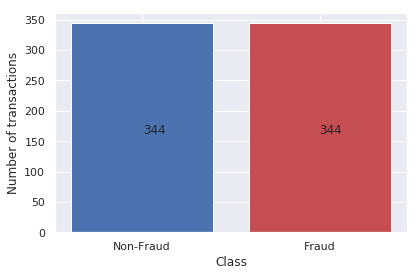

In [40]:
#Lets check if this has balanced the class

plt.bar(['Non-Fraud','Fraud'], [Counter(y_rUnderSam)[0], Counter(y_rUnderSam)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rUnderSam)[0]), (0.25, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rUnderSam)[1]), (0.75, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [41]:
## Random Over Sampling

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

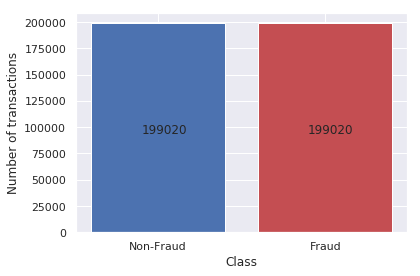

In [42]:
#Plotting to see RandomOversampling
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ros)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ros)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

#### Synthetic Minority Over-Sampling Technique (SMOTE): 

In this process, you can generate new data points, which lie vectorially between two data points that belong to the minority class. These data points are randomly chosen and then assigned to the minority class. This method uses K-nearest neighbours to create random synthetic samples. The steps in this process are as follows:
Randomly selecting a minority point A

The k nearest neighbours for that data point belonging to the same are found and then a random point, B form the k_neighbours is selected.
Specifying a random value in the range [0, 1] as 
λ
.
Generating and placing a synthetic sample between the two points A and B on the vector located at 
λ
% from the original point A.

In [43]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

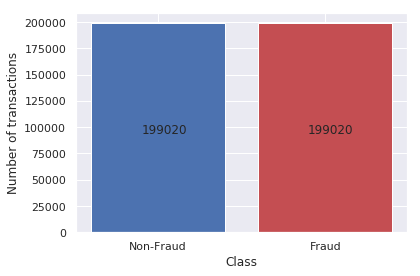

In [44]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_smote)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [45]:
# importing imblearn after installing it
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from imblearn import over_sampling


sm = over_sampling.SMOTE(random_state=0)


### Print the class distribution after applying SMOTE 

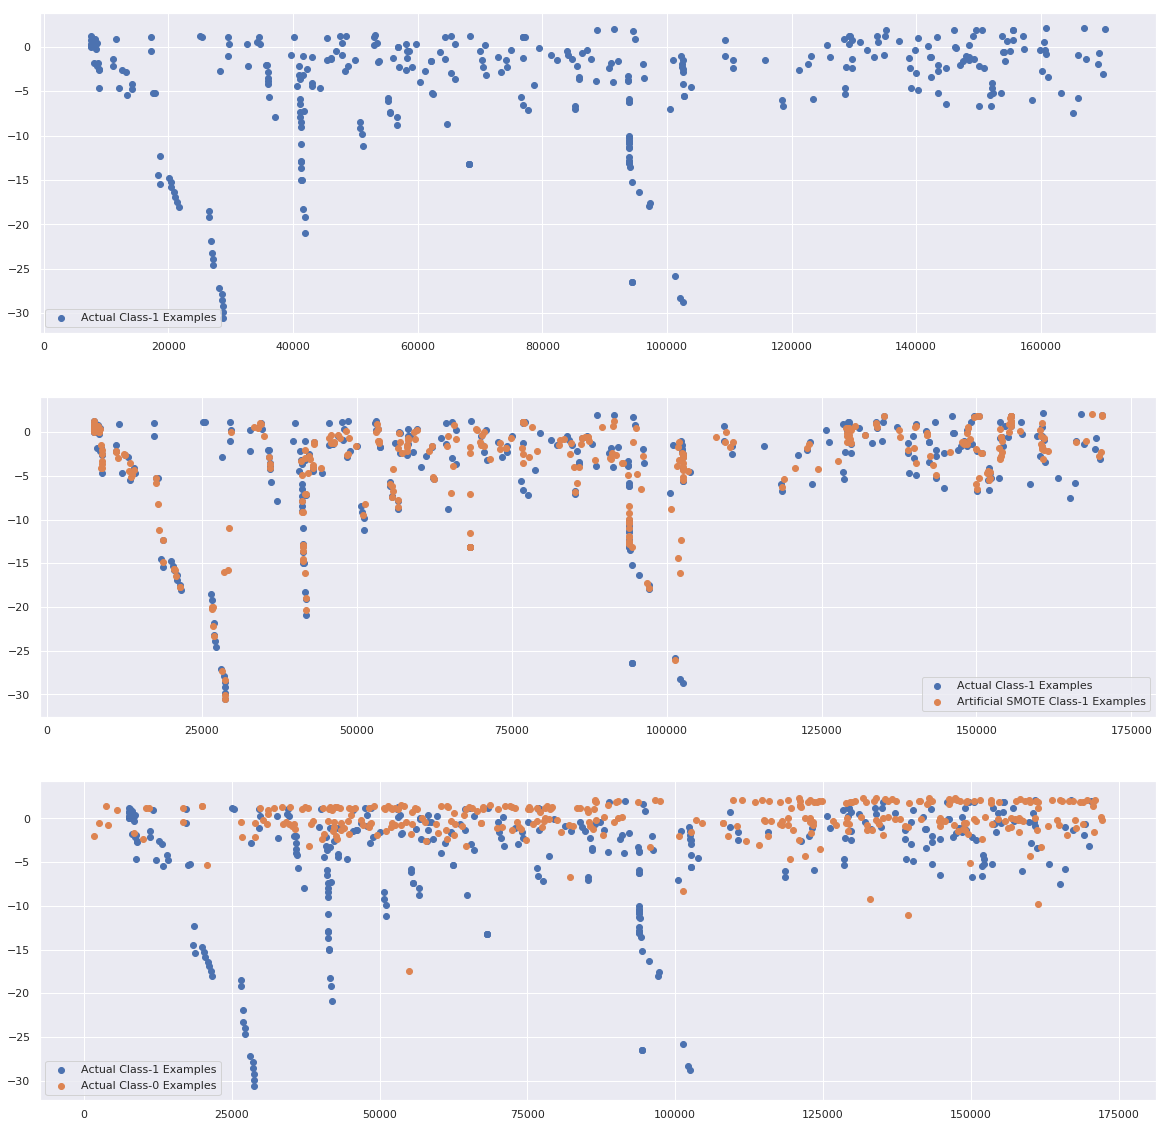

In [46]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [47]:
# trying Cross-Validation
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 

array([0.61846436, 0.43609916, 0.57113827, 0.54955101, 0.5169803 ])

In [48]:
# the other way of doing the same thing (more explicit)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.56335138, 0.56955543, 0.55452106, 0.5547002 , 0.44803926])

### 4.2 Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called **grid search** cross-validation.


<img src="grid_search_image.png"/>

In [49]:
# number of features in X_train
len(X_train.columns)

30

In [50]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [51]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.688791,0.456361,0.004363,0.000895,1,{'n_features_to_select': 1},0.105875,0.105841,0.122756,0.117700,...,0.109294,0.010003,13,0.110495,0.110301,0.106007,0.107461,0.113645,0.109582,0.002651
1,1.478511,0.128444,0.004469,0.001460,2,{'n_features_to_select': 2},0.213145,0.182235,0.213120,0.216775,...,0.202418,0.014741,12,0.200897,0.207693,0.200811,0.199948,0.207825,0.203435,0.003547
2,1.636393,0.203020,0.005839,0.002475,3,{'n_features_to_select': 3},0.286770,0.252892,0.294591,0.281984,...,0.272961,0.018642,11,0.270667,0.278253,0.268445,0.271840,0.280718,0.273985,0.004688
3,1.269764,0.098189,0.008422,0.002016,4,{'n_features_to_select': 4},0.326663,0.296261,0.333075,0.325379,...,0.312743,0.019815,10,0.310226,0.317125,0.308391,0.310489,0.321896,0.313625,0.005088
4,1.512958,0.222714,0.009988,0.001377,5,{'n_features_to_select': 5},0.378699,0.346539,0.386586,0.375626,...,0.361247,0.025190,9,0.357762,0.365212,0.355516,0.358457,0.373530,0.362096,0.006569
5,1.404381,0.151798,0.010150,0.001736,6,{'n_features_to_select': 6},0.417906,0.374123,0.409713,0.410113,...,0.390684,0.028870,8,0.393339,0.389254,0.380567,0.395234,0.413477,0.394374,0.010804
6,1.641229,0.222465,0.010917,0.002524,7,{'n_features_to_select': 7},0.444078,0.421351,0.448299,0.435939,...,0.422539,0.031145,7,0.417546,0.423224,0.416244,0.419506,0.438896,0.423083,0.008250
7,1.381287,0.214335,0.002950,0.000035,8,{'n_features_to_select': 8},0.455049,0.438027,0.459319,0.473763,...,0.439745,0.035469,6,0.430494,0.434905,0.429202,0.458499,0.452241,0.441068,0.011994
8,1.229991,0.098663,0.003445,0.000876,9,{'n_features_to_select': 9},0.499168,0.486607,0.495774,0.489135,...,0.474148,0.037318,5,0.467767,0.471505,0.468439,0.470171,0.493911,0.474358,0.009864
9,1.427211,0.231766,0.003354,0.000334,10,{'n_features_to_select': 10},0.518139,0.508059,0.513770,0.506342,...,0.492710,0.037968,4,0.486139,0.489368,0.487043,0.488983,0.512751,0.492857,0.010019


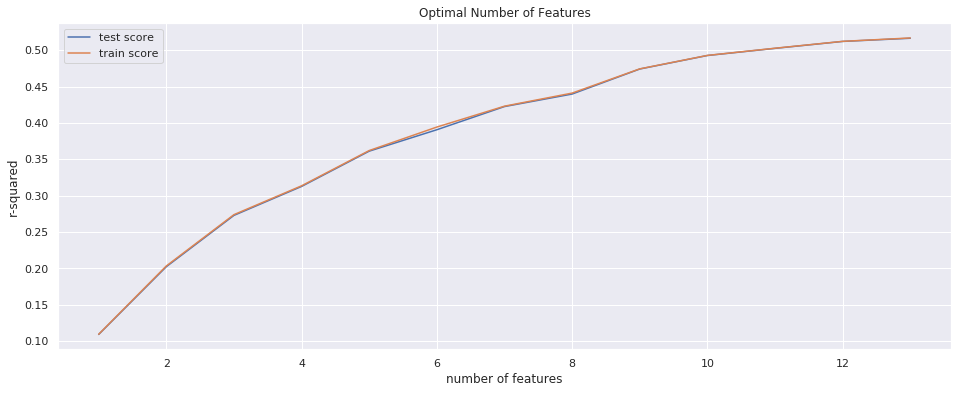

In [52]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### Now we can choose the optimal value of number of features and build a final model.

In [53]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.4835995472530631


Notice that the test score is very close to the 'mean test score' on the k-folds (about 50%). In general, the mean score estimated by CV will usually be a good estimate of the test score. 

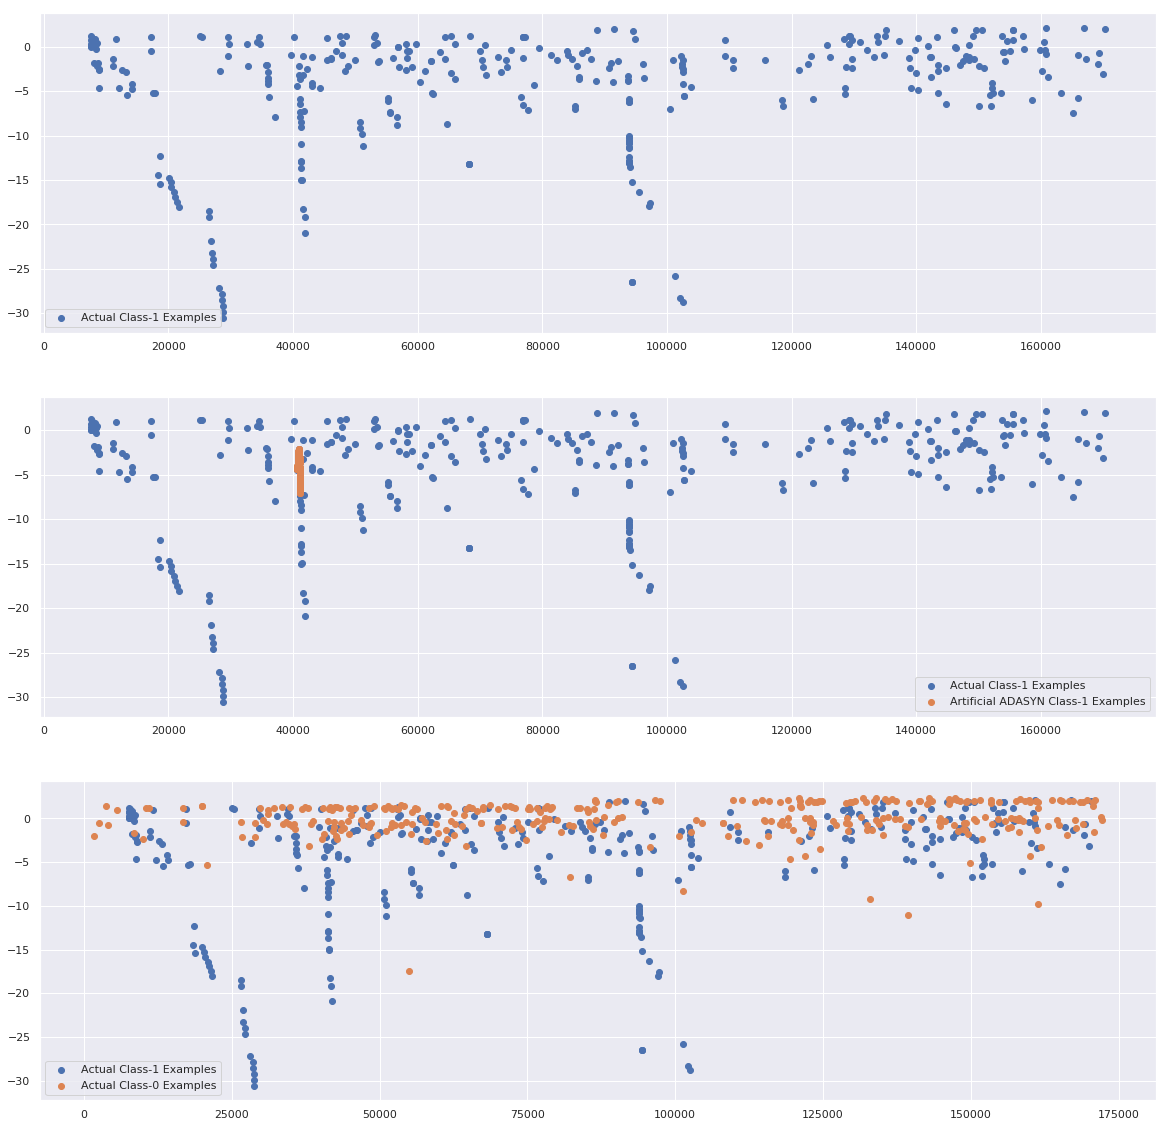

In [54]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()